In [11]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../utils/")
import Toolbox as tb
from Toolbox import *

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# Cargar el archivo CSV
data = pd.read_csv("../data/wines_dataset.csv", sep="|")

"""
División de datos en entrenamiento y prueba.

Se toma el 80% de los datos para entrenamiento y el 20% restante para prueba.

Parámetros:
- test_size (float): Proporción del conjunto de prueba (0.2 = 20% de los datos).
- random_state (int): Semilla para la reproducibilidad de la división.

Salida:
- train (DataFrame): Conjunto de entrenamiento.
- test (DataFrame): Conjunto de prueba.
"""
train, test = train_test_split(data, test_size=0.2, random_state=42)

"""
Guardado de los conjuntos de datos en archivos CSV.

Los archivos se almacenan en la carpeta "../data/" con los nombres:
- wines_train.csv → Contiene el 80% de los datos para entrenamiento.
- wines_test.csv → Contiene el 20% de los datos para prueba.

index=False evita que se guarde el índice en los archivos.
"""
train.to_csv(os.path.join("../data/", 'wines_train.csv'), index=False)
test.to_csv(os.path.join("../data/", 'wines_test.csv'), index=False)

In [12]:
# Cargar el conjunto de datos de entrenamiento desde el archivo CSV
df = pd.read_csv("../data/wines_train.csv")

# Mostrar el DataFrame cargado
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.9,0.18,0.40,2.20,0.049,38.0,67.0,0.99600,3.33,0.93,11.3,5,red
1,7.1,0.18,0.74,15.60,0.044,44.0,176.0,0.99960,3.38,0.67,9.0,6,white
2,7.6,0.51,0.24,1.20,0.040,10.0,104.0,0.99200,3.05,0.29,10.8,6,white
3,6.0,0.25,0.28,7.70,0.053,37.0,132.0,0.99489,3.06,0.50,9.4,6,white
4,9.0,0.38,0.41,2.40,0.103,6.0,10.0,0.99604,3.13,0.58,11.9,7,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,6.4,0.24,0.50,11.60,0.047,60.0,211.0,0.99660,3.18,0.57,9.3,5,white
5193,6.6,0.22,0.28,12.05,0.058,25.0,125.0,0.99856,3.45,0.45,9.4,5,white
5194,6.6,0.20,0.38,7.90,0.052,30.0,145.0,0.99470,3.32,0.56,11.0,7,white
5195,7.3,0.41,0.29,1.80,0.032,26.0,74.0,0.98889,2.96,0.35,13.0,8,white


In [13]:
# Cargar el conjunto de datos de prueba desde el archivo CSV
df_test = pd.read_csv("../data/wines_test.csv")

# Mostrar el DataFrame cargado
df_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.320,0.27,1.4,0.049,38.0,173.0,0.99335,3.03,0.52,9.3,5,white
1,6.6,0.340,0.24,3.3,0.034,29.0,99.0,0.99031,3.10,0.40,12.3,7,white
2,6.4,0.320,0.35,4.8,0.030,34.0,101.0,0.99120,3.36,0.60,12.5,8,white
3,6.8,0.230,0.32,1.6,0.026,43.0,147.0,0.99040,3.29,0.54,12.5,6,white
4,6.7,0.340,0.26,1.9,0.038,58.0,138.0,0.98930,3.00,0.47,12.2,7,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,7.6,0.285,0.32,14.6,0.063,32.0,201.0,0.99800,3.00,0.45,9.2,5,white
1296,11.6,0.470,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9,4,red
1297,10.2,0.340,0.48,2.1,0.052,5.0,9.0,0.99458,3.20,0.69,12.1,7,red
1298,6.2,0.460,0.17,1.6,0.073,7.0,11.0,0.99425,3.61,0.54,11.4,5,red


In [14]:
# Genera un resumen descriptivo del DataFrame utilizando la función tb.describe_df(df).
# 
#  Muestra información sobre:
#    - DATA_TYPE: Tipo de dato de cada columna (numérico, categórico, etc.).
#    - MISSINGS (%): Porcentaje de valores nulos en cada columna.
#    - UNIQUE_VALUES: Cantidad de valores únicos en cada columna.
#    - CARDIN (%): Cardinalidad relativa (valores únicos / total de filas).
# 
# Útil para comprender la estructura de los datos antes del preprocesamiento.

tb.describe_df(df)

COL_N,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
DATA_TYPE,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,100,177,87,308,194,132,274,951,106,106,102,7,2
CARDIN (%),0.02,0.03,0.02,0.06,0.04,0.03,0.05,0.18,0.02,0.02,0.02,0.0,0.0


In [17]:
# Definición de variables objetivo para el análisis:

# target_clf = "quality" → Problema de Clasificación
#    - La variable `quality` representa la calidad del vino.
#    - Es una variable categórica con 7 valores únicos (multiclase).
#    - Se utilizarán modelos de clasificación, como RandomForestClassifier o XGBoost.
#    - Es necesario aplicar OneHotEncoder a variables categóricas y StandardScaler a las numéricas.

# target_reg = "alcohol" → Problema de Regresión
#    - La variable `alcohol` indica el porcentaje de alcohol en el vino.
#    - Es una variable numérica continua.
#    - Se utilizarán modelos de regresión, como RandomForestRegressor o LinearRegression.
#    - Requiere escalado de las variables numéricas (StandardScaler) y codificación de las categóricas (OneHotEncoder).

# 📌 Ambos problemas requieren preprocesamiento adecuado según el tipo de modelo utilizado.

target_clf = "quality"
target_reg = "alcohol"

In [18]:
# Definición de las características (features) utilizadas en la clasificación:

# features_cat_clf → Variables categóricas
#    - Contiene solo la variable "class" (tipo de vino: tinto o blanco).
#    - Se debe transformar con OneHotEncoder para convertirla en variables numéricas.

# features_num_clf_1 → Variables numéricas principales
#    - Incluye medidas químicas clave como "volatile acidity", "chlorides", "density", "pH", etc.
#    - Se recomienda aplicar StandardScaler para normalizar estas características.

# features_num_clf_2 → Variables numéricas adicionales
#    - Contiene "fixed acidity" y "residual sugar".
#    - Estas características pueden ser analizadas por separado o combinadas con las anteriores.

features_cat_clf = ["class"]
features_num_clf_1 = ["volatile acidity", "citric acid", "chlorides", "free sulfur dioxide",
                      "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
features_num_clf_2 = ["fixed acidity", "residual sugar"]


In [19]:
# Definición de características (features) para el problema de regresión:

# features_cat_reg → Variables categóricas
#    - Contiene "class" (tipo de vino: tinto o blanco) y "quality" (calidad del vino).
#    - Estas variables deben ser transformadas con OneHotEncoder.

# features_num_reg → Variables numéricas
#    - Se seleccionan todas las columnas del DataFrame excepto las categóricas.
#    - Esto se logra con una lista por comprensión, excluyendo las columnas en features_cat_reg.
#    - Estas variables deben ser escaladas con StandardScaler.

features_cat_reg = ["class", "quality"]
features_num_reg = [col for col in df.columns if col not in features_cat_reg]

# Ahora features_num_reg contiene solo las variables numéricas.

In [20]:
# Estudio de correlaciones entre las variables numéricas y la variable objetivo de regresión.

# Calculamos la matriz de correlación solo para las variables numéricas.
#    - Se utiliza df[features_num_reg] para excluir las variables categóricas.
#    - numeric_only="True" se usa para evitar advertencias en versiones recientes de pandas.

# Extraemos la correlación absoluta de cada variable con el target de regresión ("alcohol").
#    - np.abs() se usa para obtener la magnitud de la correlación sin importar el signo.
#    - .sort_values(ascending=False) ordena las variables de mayor a menor correlación.

corr = df[features_num_reg].corr(numeric_only="True")
serie_corr = np.abs(corr[target_reg]).sort_values(ascending=False)
serie_corr

# Ahora, serie_corr contiene las variables ordenadas según su grado de correlación con "alcohol".

alcohol                 1.000000
density                 0.682345
residual sugar          0.357459
total sulfur dioxide    0.272970
chlorides               0.260508
free sulfur dioxide     0.188460
pH                      0.116497
fixed acidity           0.091964
volatile acidity        0.036041
citric acid             0.005690
sulphates               0.000412
Name: alcohol, dtype: float64

In [21]:
# Selección de características numéricas basadas en la correlación con el target de regresión.

# Definimos un umbral mínimo de correlación.
#    - r_min = 0.05 significa que solo seleccionaremos variables con correlación mayor a 0.05.

r_min = 0.05

# Seleccionamos las variables numéricas con correlación significativa con el target.
#    - Tomamos solo las variables con correlación absoluta mayor que r_min.
#    - Convertimos los nombres de las columnas en una lista.
#    - Eliminamos el target ("alcohol") de la lista, ya que no es una feature.

features_num_reg_1 = serie_corr[serie_corr > r_min].index.to_list()
features_num_reg_1.remove(target_reg)

# Identificamos las variables numéricas con correlación baja o nula con el target.
#    - Excluimos las variables en features_num_reg_1.
#    - Excluimos el target y las variables categóricas.

features_num_reg_2 = [col for col in df.columns if col not in features_num_reg_1 and col != target_reg
                       and col not in features_cat_reg]

# Ahora:
# - features_num_reg_1 contiene las variables más correlacionadas con "alcohol".
# - features_num_reg_2 contiene las variables menos correlacionadas.

In [22]:
features_num_reg_1

['density',
 'residual sugar',
 'total sulfur dioxide',
 'chlorides',
 'free sulfur dioxide',
 'pH',
 'fixed acidity']

In [23]:
# Definición del problema de clasificación.

# target_clf → Variable objetivo para clasificación.
#    - Se ha definido previamente como "quality".
#    - Representa la calidad del vino en una escala categórica.
#    - Es un problema de clasificación **multiclase** (7 categorías posibles).

target_clf

'quality'

In [24]:
# Definición de las características categóricas para el problema de clasificación.

# features_cat_clf → Variables categóricas a incluir en el modelo de clasificación.
#    - Contiene la variable "class" (tipo de vino: tinto o blanco).
#    - Se debe transformar con OneHotEncoder para convertirla en variables numéricas.

features_cat_clf

['class']

In [25]:
# Definición de características numéricas principales para clasificación.

# features_num_clf_1 → Variables numéricas seleccionadas para el modelo de clasificación.
#    - Incluye medidas químicas clave del vino:
#      - "volatile acidity", "citric acid", "chlorides", "free sulfur dioxide",
#      - "total sulfur dioxide", "density", "pH", "sulphates", "alcohol".
#    - Se recomienda aplicar StandardScaler para normalizar estas características antes del modelado.

features_num_clf_1

['volatile acidity',
 'citric acid',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [26]:
# Definición del problema de regresión.

# target_reg → Variable objetivo para regresión.
#    - Se ha definido previamente como "alcohol".
#    - Representa el porcentaje de alcohol en el vino (variable continua).
#    - Es un problema de regresión, ya que el target es numérico y continuo.

target_reg

'alcohol'

In [27]:
# Definición de las características categóricas para el problema de regresión.

# features_cat_reg → Variables categóricas a incluir en el modelo de regresión.
#    - Contiene:
#      - "class" (tipo de vino: tinto o blanco).
#      - "quality" (calidad del vino en una escala categórica).
#    - Ambas variables deben ser transformadas con OneHotEncoder para su uso en modelos numéricos.

features_cat_reg

['class', 'quality']

In [28]:
# Definición de características numéricas principales para regresión.

# features_num_reg_1 → Variables numéricas con mayor correlación con el target de regresión ("alcohol").
#    - Se han seleccionado aquellas con correlación absoluta > r_min (0.05).
#    - Estas variables son las más relevantes para predecir el contenido de alcohol en el vino.
#    - Se recomienda aplicar StandardScaler para normalizar estas características antes del modelado.

features_num_reg_1

['density',
 'residual sugar',
 'total sulfur dioxide',
 'chlorides',
 'free sulfur dioxide',
 'pH',
 'fixed acidity']

In [29]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Definición de columnas a incluir y excluir en el modelo de clasificación.

# columns_to_keep_clf → Columnas que se mantendrán en el modelo de clasificación.
#    - Incluye:
#      - target_clf (variable objetivo de clasificación: "quality").
#      - features_num_clf_1 (variables numéricas relevantes).
#      - features_cat_clf (variables categóricas a transformar con OneHotEncoder).

# columns_to_exclude_clf → Columnas que se excluirán del modelo de clasificación.
#    - Se obtienen eliminando de df.columns las variables incluidas en columns_to_keep_clf.
#    - Estas columnas no serán utilizadas en el modelo.

columns_to_keep_clf = [target_clf] + features_num_clf_1 + features_cat_clf

columns_to_exclude_clf = [col for col in df.columns if col not in columns_to_keep_clf]

columns_to_exclude_clf


['fixed acidity', 'residual sugar']

In [30]:
# Definición de columnas a incluir y excluir en el modelo de regresión.

# columns_to_keep_reg → Columnas que se mantendrán en el modelo de regresión.
#    - Incluye:
#      - target_reg (variable objetivo de regresión: "alcohol").
#      - features_num_reg_1 (variables numéricas más correlacionadas con el target).
#      - features_cat_reg (variables categóricas a transformar con OneHotEncoder).

# columns_to_exclude_reg → Columnas que se excluirán del modelo de regresión.
#    - Se obtienen eliminando de df.columns las variables incluidas en columns_to_keep_reg.
#    - Estas columnas no serán utilizadas en el modelo.

columns_to_keep_reg = [target_reg] + features_num_reg_1 + features_cat_reg

columns_to_exclude_reg = [col for col in df.columns if col not in columns_to_keep_reg]

columns_to_exclude_reg

['volatile acidity', 'citric acid', 'sulphates']

In [ ]:
from sklearn.preprocessing import FunctionTransformer

# Definición de Pipelines para preprocesamiento de datos en clasificación.

# cat_pipeline → Preprocesamiento de variables categóricas.
#    - "Impute_Mode": Imputa valores faltantes con la moda (valor más frecuente).
#    - "OHEncoder": Aplica OneHotEncoder, ignorando categorías desconocidas.

# logaritmica → Transformación logarítmica de variables numéricas.
#    - Usa FunctionTransformer con np.log1p para estabilizar distribuciones sesgadas.
#    - feature_names_out="one-to-one" mantiene los nombres originales de las características.

# num_pipeline → Preprocesamiento de variables numéricas.
#    - "Impute_Mean": Imputa valores faltantes con la media.
#    - "logaritmo": Aplica la transformación logarítmica definida antes.
#    - "SScaler": Aplica StandardScaler para normalizar las variables numéricas.

# imputer_step_cat → ColumnTransformer para aplicar los Pipelines según el tipo de variable.
#    - "Process_Numeric": Aplica num_pipeline a features_num_clf_1 (variables numéricas).
#    - "Process_Categorical": Aplica cat_pipeline a features_cat_clf (variables categóricas).
#    - "Exclude": Elimina las columnas en columns_to_exclude_clf.
#    - remainder="passthrough": Mantiene cualquier otra columna sin modificar.

# pipe_missings_cat → Pipeline final que aplica el ColumnTransformer imputer_step_cat.

cat_pipeline = Pipeline(
    [("Impute_Mode", SimpleImputer(strategy="most_frequent")),  # Imputación con la moda
     ("OHEncoder", OneHotEncoder(handle_unknown='ignore'))  # Manejar categorías desconocidas
    ]
)

logaritmica = FunctionTransformer(np.log1p, feature_names_out="one-to-one") 
# Esto le indica al Pipeline que el número de características no cambia y que puede usar los nombres originales.

num_pipeline = Pipeline(
    [("Impute_Mean", SimpleImputer(strategy = "mean")), # prevision que en el futuro lleguen datos faltantes
     ("logaritmo", logaritmica),
     ("SScaler", StandardScaler()),
    ]
)

imputer_step_cat = ColumnTransformer(
    [("Process_Numeric", num_pipeline,features_num_clf_1), # feature_numericas seleccionadas para clasificación
     ("Process_Categorical", cat_pipeline, features_cat_clf), # feature_categoriacas seleccionadas para regresión
     ("Exclude", "drop", columns_to_exclude_clf)
    ], remainder = "passthrough"
    )

pipe_missings_cat = Pipeline([("first_stage", imputer_step_cat)])

In [33]:
from sklearn.preprocessing import FunctionTransformer

# Definición de Pipelines para preprocesamiento de datos en regresión.

# cat_pipeline → Preprocesamiento de variables categóricas.
#    - "Impute_Mode": Imputa valores faltantes con la moda (valor más frecuente).
#    - "OHEncoder": Aplica OneHotEncoder, ignorando categorías desconocidas.

# logaritmica → Transformación logarítmica de variables numéricas.
#    - Usa FunctionTransformer con np.log1p para estabilizar distribuciones sesgadas.
#    - feature_names_out="one-to-one" mantiene los nombres originales de las características.

# num_pipeline → Preprocesamiento de variables numéricas.
#    - "Impute_Mean": Imputa valores faltantes con la media.
#    - "logaritmo": Aplica la transformación logarítmica definida antes.
#    - "SScaler": Aplica StandardScaler para normalizar las variables numéricas.

# imputer_step_reg → ColumnTransformer para aplicar los Pipelines según el tipo de variable.
#    - "Process_Numeric": Aplica num_pipeline a features_num_reg_1 (variables numéricas seleccionadas para regresión).
#    - "Process_Categorical": Aplica cat_pipeline a features_cat_reg (variables categóricas seleccionadas para regresión).
#    - "Exclude": Elimina las columnas en columns_to_exclude_reg.
#    - remainder="passthrough": Mantiene cualquier otra columna sin modificar.

# pipe_missings_reg → Pipeline final que aplica el ColumnTransformer imputer_step_reg.

cat_pipeline = Pipeline(
    [("Impute_Mode", SimpleImputer(strategy="most_frequent")),  # Imputación con la moda
     ("OHEncoder", OneHotEncoder(handle_unknown='ignore'))  # Manejar categorías desconocidas
    ]
)

logaritmica = FunctionTransformer(np.log1p, feature_names_out="one-to-one") # Esto le indica al Pipeline que el número de características no cambia y que puede usar los nombres originales.

num_pipeline = Pipeline(
    [("Impute_Mean", SimpleImputer(strategy = "mean")), # prevision que en el futuro lleguen datos faltantes
     ("logaritmo", logaritmica),
     ("SScaler", StandardScaler()),
    ]
)

imputer_step_reg = ColumnTransformer(
    [("Process_Numeric", num_pipeline,features_num_reg_1), # feature_numericas seleccionadas para clasificación
     ("Process_Categorical", cat_pipeline, features_cat_reg), # feature_categoriacas seleccionadas para regresión
     ("Exclude", "drop", columns_to_exclude_reg)
    ], remainder = "passthrough"
    )

pipe_missings_reg = Pipeline([("first_stage", imputer_step_reg)])

In [34]:
# Aplicación del pipeline de preprocesamiento a los datos de prueba.

# pipe_missings_cat.fit_transform(df_test)
#    - Aplica el pipeline de preprocesamiento definido para clasificación.
#    - Imputa valores faltantes en variables numéricas y categóricas.
#    - Transforma variables categóricas con OneHotEncoder.
#    - Aplica escalado y transformación logarítmica a las variables numéricas.

# pipe_df_test → Contiene los datos de prueba preprocesados y listos para el modelo.

pipe_df_test = pipe_missings_cat.fit_transform(df_test)

pipe_df_test

array([[-0.06561088, -0.27783928, -0.1913355 , ...,  0.        ,
         1.        ,  5.        ],
       [ 0.061259  , -0.49980343, -0.57998343, ...,  0.        ,
         1.        ,  7.        ],
       [-0.06561088,  0.2893635 , -0.68457525, ...,  0.        ,
         1.        ,  8.        ],
       ...,
       [ 0.061259  ,  1.14300849, -0.11427313, ...,  1.        ,
         0.        ,  7.        ],
       [ 0.78484693, -1.03933617,  0.41908799, ...,  1.        ,
         0.        ,  5.        ],
       [ 0.18624926, -1.28052007, -0.52783916, ...,  0.        ,
         1.        ,  5.        ]])

In [35]:
# Aplicación del pipeline de preprocesamiento a los datos de entrenamiento.

# pipe_missings_cat.fit_transform(df)
#    - Aplica el pipeline de preprocesamiento definido para clasificación.
#    - Imputa valores faltantes en variables numéricas y categóricas.
#    - Transforma variables categóricas con OneHotEncoder.
#    - Aplica escalado y transformación logarítmica a las variables numéricas.

# pipe_df → Contiene los datos de entrenamiento preprocesados y listos para el modelo.

pipe_df = pipe_missings_cat.fit_transform(df)
pipe_df

array([[-1.05515355,  0.59288805, -0.20549433, ...,  1.        ,
         0.        ,  5.        ],
       [-1.05515355,  2.5608768 , -0.37024226, ...,  0.        ,
         1.        ,  6.        ],
       [ 1.11199789, -0.50565223, -0.5026097 , ...,  0.        ,
         1.        ,  6.        ],
       ...,
       [-0.90744764,  0.46264335, -0.10702207, ...,  0.        ,
         1.        ,  7.        ],
       [ 0.5098244 , -0.14782501, -0.7688788 , ...,  0.        ,
         1.        ,  8.        ],
       [-1.05515355, -0.21826777, -0.53578111, ...,  0.        ,
         1.        ,  6.        ]])

In [36]:
# Conversión de los datos preprocesados a un DataFrame con nombres de columnas.

# pd.DataFrame(pipe_df, columns=pipe_missings_cat.get_feature_names_out())
#    - Convierte los datos preprocesados (pipe_df) en un DataFrame de pandas.
#    - Asigna los nombres de las características generados por el ColumnTransformer.
#    - Permite verificar que las transformaciones se aplicaron correctamente.

# df_check → Contiene los datos de entrenamiento preprocesados en formato DataFrame, con nombres de columnas.

df_check = pd.DataFrame(pipe_df, columns= pipe_missings_cat.get_feature_names_out())
df_check

,Process_Numeric__volatile acidity,Process_Numeric__citric acid,Process_Numeric__chlorides,Process_Numeric__free sulfur dioxide,Process_Numeric__total sulfur dioxide,Process_Numeric__density,Process_Numeric__pH,Process_Numeric__sulphates,Process_Numeric__alcohol,Process_Categorical__class_red,Process_Categorical__class_white,remainder__quality
0,-1.055154,0.592888,-0.205494,0.603446,-0.505241,0.427700,0.706744,2.584726,0.720172,1.0,0.0,5.0
1,-1.055154,2.560877,-0.370242,0.820606,0.855001,1.621578,1.011233,0.998990,-1.312752,0.0,1.0,6.0
2,1.111998,-0.505652,-0.502610,-1.317236,0.112504,-0.901360,-1.066182,-1.830435,0.312635,0.0,1.0,6.0
3,-0.548692,-0.218268,-0.074260,0.564028,0.448623,0.059153,-1.000780,-0.177558,-0.927596,0.0,1.0,6.0
4,0.320822,0.657314,1.525362,-2.003136,-3.095378,0.440977,-0.547423,0.391872,1.187890,1.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5192,-0.619281,1.217401,-0.271299,1.282255,1.111562,0.626829,-0.228277,0.322290,-1.022479,0.0,1.0,5.0
5193,-0.762183,-0.218268,0.089083,-0.011858,0.371746,1.276901,1.431729,-0.549087,-0.927596,0.0,1.0,5.0
5194,-0.907448,0.462643,-0.107022,0.255061,0.581225,-0.003952,0.645425,0.252264,0.477685,0.0,1.0,7.0
5195,0.509824,-0.147825,-0.768879,0.045414,-0.365924,-1.936549,-1.662178,-1.332210,1.991478,0.0,1.0,8.0


In [37]:
# Conversión de los datos de prueba preprocesados a un DataFrame con nombres de columnas.

# pd.DataFrame(pipe_df_test, columns=pipe_missings_cat.get_feature_names_out())
#    - Convierte los datos de prueba preprocesados (pipe_df_test) en un DataFrame de pandas.
#    - Asigna los nombres de las características generados por el ColumnTransformer.
#    - Permite verificar que las transformaciones se aplicaron correctamente.

# df_check_test → Contiene los datos de prueba preprocesados en formato DataFrame, con nombres de columnas.

df_check_test = pd.DataFrame(pipe_df_test, columns= pipe_missings_cat.get_feature_names_out())
df_check_test

,Process_Numeric__volatile acidity,Process_Numeric__citric acid,Process_Numeric__chlorides,Process_Numeric__free sulfur dioxide,Process_Numeric__total sulfur dioxide,Process_Numeric__density,Process_Numeric__pH,Process_Numeric__sulphates,Process_Numeric__alcohol,Process_Categorical__class_red,Process_Categorical__class_white,remainder__quality
0,-0.065611,-0.277839,-0.191336,0.609936,0.831639,-0.433274,-1.146519,-0.036117,-1.034552,0.0,1.0,5.0
1,0.061259,-0.499803,-0.579983,0.200694,0.019098,-1.467980,-0.701377,-0.919534,1.489510,0.0,1.0,7.0
2,-0.065611,0.289363,-0.684575,0.441142,0.048148,-1.164893,0.887973,0.514885,1.636890,0.0,1.0,8.0
3,-0.661389,0.080702,-0.789574,0.798095,0.594218,-1.437325,0.469593,0.104306,1.636890,0.0,1.0,6.0
4,0.061259,-0.351239,-0.475795,1.255666,0.502182,-1.812097,-1.339665,-0.395421,1.414987,0.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,-0.292330,0.080702,0.166421,0.349361,1.050532,1.146368,-1.339665,-0.542576,-1.130887,0.0,1.0,5.0
1296,0.842435,0.888607,2.218732,0.527821,-0.940203,1.268510,1.006277,2.132366,-0.475482,1.0,0.0,4.0
1297,0.061259,1.143008,-0.114273,-2.309748,-3.358761,-0.015075,-0.078471,1.102750,1.339897,1.0,0.0,7.0
1298,0.784847,-1.039336,0.419088,-1.861014,-3.091298,-0.127250,2.329225,0.104306,0.797644,1.0,0.0,5.0


In [38]:
### EVALUACIÓN DE MODELOS DE CLASIFICACIÓN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [40]:
target_clf

'quality'

In [43]:
X_train = df_check
y_train = df[target_clf]
X_test = df_check_test
y_test = df_test[target_clf]

In [45]:
def evaluar_modelos_clasificacion(X_train_scaled, y_train):
    """
    Entrena y evalúa múltiples modelos de clasificación utilizando validación cruzada.
    """
    model_names = [
        "Logistic Regression", "SVC", "Decision Tree", "Random Forest", "KNN", 
        "Gradient Boosting", "AdaBoost", "XGBoost", "LightGBM", "CatBoost"
    ]
    model_set = [
        LogisticRegression(max_iter=10000),
        SVC(),
        DecisionTreeClassifier(random_state=42),
        RandomForestClassifier(random_state=42),
        KNeighborsClassifier(),
        GradientBoostingClassifier(random_state=42),
        AdaBoostClassifier(random_state=42),
        XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"),
        LGBMClassifier(random_state=42, verbose=-100),
        CatBoostClassifier(random_state=42, verbose=False, train_dir='./catboost_temp_fix')
    ]
    metricas_cv = {}
    valores = []
    for nombre, modelo in zip(model_names, model_set):
        print(f"Evaluando modelo: {nombre}...")
        try:
            scores = cross_val_score(modelo, X_train_scaled, y_train, cv=3, scoring="accuracy", n_jobs=-1)
            metricas_cv[nombre] = scores
            valores.append(np.mean(scores))
        except Exception as e:
            print(f"Error con el modelo {nombre}: {e}")
            metricas_cv[nombre] = None
            valores.append(-np.inf)
    ganador = model_names[np.argmax(valores)]
    print(f"\nEl modelo ganador es: {ganador} con una accuracy media de {np.max(valores):.4f}\n")
    resultados_df = pd.DataFrame({
        "Modelo": model_names,
        "Accuracy Media": valores
    }).sort_values(by="Accuracy Media", ascending=False)
    print(resultados_df)
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Accuracy Media", y="Modelo", data=resultados_df, palette="viridis", hue=None)
    plt.title("Comparación de Modelos - Accuracy Media", fontsize=16)
    plt.xlabel("Accuracy Media", fontsize=12)
    plt.ylabel("Modelos", fontsize=12)
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()
    return resultados_df

Evaluando modelo: Logistic Regression...
Evaluando modelo: SVC...
Evaluando modelo: Decision Tree...
Evaluando modelo: Random Forest...
Evaluando modelo: KNN...
Evaluando modelo: Gradient Boosting...
Evaluando modelo: AdaBoost...
Evaluando modelo: XGBoost...
Error con el modelo XGBoost: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
 

c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_


El modelo ganador es: CatBoost con una accuracy media de nan

                Modelo  Accuracy Media
2        Decision Tree        1.000000
5    Gradient Boosting        1.000000
8             LightGBM        0.999038
0  Logistic Regression        0.993650
3        Random Forest        0.993458
1                  SVC        0.993073
4                  KNN        0.908986
6             AdaBoost        0.771407
7              XGBoost            -inf
9             CatBoost             NaN


C:\Users\rodri\AppData\Local\Temp\ipykernel_10100\174657.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy Media", y="Modelo", data=resultados_df, palette="viridis", hue=None)


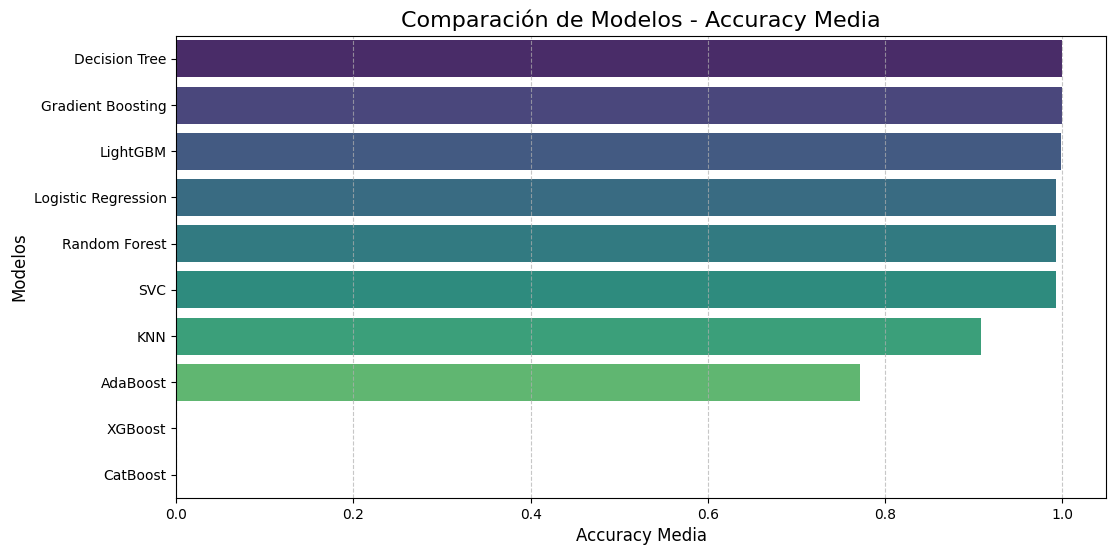

,Modelo,Accuracy Media
2,Decision Tree,1.000000
5,Gradient Boosting,1.000000
8,LightGBM,0.999038
0,Logistic Regression,0.993650
3,Random Forest,0.993458
1,SVC,0.993073
4,KNN,0.908986
6,AdaBoost,0.771407
7,XGBoost,-inf
9,CatBoost,NaN


In [46]:
evaluar_modelos_clasificacion(X_train, y_train)

In [ ]:
### EVALUACION DE MODELOS DE REGRESION

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [ ]:
def evaluar_modelos_regresion(X_train_scaled, y_train):
    """
    Entrena y evalúa múltiples modelos de regresión utilizando validación cruzada.
    """
    model_names = [
        "Linear Regression", "Ridge", "Lasso", "SVR", "Decision Tree", "Random Forest", 
        "KNN", "Gradient Boosting", "AdaBoost", "XGBoost", "LightGBM", "CatBoost"
    ]
    model_set = [
        LinearRegression(),
        Ridge(alpha=1.0),
        Lasso(alpha=0.1),
        SVR(),
        DecisionTreeRegressor(random_state=42),
        RandomForestRegressor(random_state=42),
        KNeighborsRegressor(),
        GradientBoostingRegressor(random_state=42),
        AdaBoostRegressor(random_state=42),
        XGBRegressor(random_state=42, eval_metric="rmse"),
        LGBMRegressor(random_state=42, verbose=-100),
        CatBoostRegressor(random_state=42, verbose=False, train_dir='./catboost_temp_fix')
    ]
    metricas_cv = {}
    valores = []
    for nombre, modelo in zip(model_names, model_set):
        print(f"Evaluando modelo: {nombre}...")
        try:
            scores = cross_val_score(modelo, X_train_scaled, y_train, cv=3, scoring="r2", n_jobs=-1)
            metricas_cv[nombre] = scores
            valores.append(np.mean(scores))
        except Exception as e:
            print(f"Error con el modelo {nombre}: {e}")
            metricas_cv[nombre] = None
            valores.append(-np.inf)
    ganador = model_names[np.argmax(valores)]
    print(f"\nEl modelo ganador es: {ganador} con un R^2 medio de {np.max(valores):.4f}\n")
    resultados_df = pd.DataFrame({
        "Modelo": model_names,
        "R^2 Medio": valores
    }).sort_values(by="R^2 Medio", ascending=False)
    print(resultados_df)
    plt.figure(figsize=(12, 6))
    sns.barplot(x="R^2 Medio", y="Modelo", data=resultados_df, palette="viridis", hue=None)
    plt.title("Comparación de Modelos de Regresión - R^2 Medio", fontsize=16)
    plt.xlabel("R^2 Medio", fontsize=12)
    plt.ylabel("Modelos", fontsize=12)
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()
    return resultados_df

### ARGUMENTOS A METER EN EL PIPELINE: TIPO_MODELO, CV, TOP_N (numero de modelos a los que quiero ahcer grid search) (podríamos tbn hacer una última función que hicera un grid_search mas extenso del ganador, con param_grids mas largos y cv mayor) (podriamos añadir alguna forma de obviar esta función y ir directamente a la última del grid_search largo)

No se si cambiaria la metrica de la regresion al rmse, mse o mae

No entiendo algunos parametros de XGBoost y CatBoost: 

In [ ]:
"XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss") 
"CatBoost": CatBoostClassifier(random_state=42, verbose=False, train_dir='./catboost_temp_fix')

In [ ]:
from sklearn.model_selection import GridSearchCV

def top_grid_search(df_resultados, X_train, y_train, tipo_modelo="clasificacion", top_n=3, cv=5):
    """
    Extrae los n mejores modelos obtenidos en cross-validation, les realiza GridSearchCV y devuelve el mejor modelo optimizado.

    Parametros:
    - df_resultados: DataFrame con los modelos y sus metricas.
    - X_train, y_train: Datos de entrenamiento.
    - tipo_modelo: "clasificacion" o "regresion".
    - top_n: Numero de mejores modelos a seleccionar para el GridSearch.
    - cv: Número de folds para la validación cruzada.

    DEvuelve el nombre del mejor modelo.
    """

    metrica = "Accuracy Media" if tipo_modelo == "clasificacion" else "R^2 Medio"

    modelos_clf = {
        "Logistic Regression": LogisticRegression(max_iter=10000),
        "SVC": SVC(),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "KNN": KNeighborsClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "AdaBoost": AdaBoostClassifier(random_state=42),
        "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"),
        "LightGBM": LGBMClassifier(random_state=42, verbose=-100),
        "CatBoost": CatBoostClassifier(random_state=42, verbose=False, train_dir='./catboost_temp_fix')
    }

    modelos_reg = {
        "Linear Regression": LinearRegression(),
        "Ridge": Ridge(alpha=1.0),
        "Lasso": Lasso(alpha=0.1),
        "SVR": SVR(),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(random_state=42),
        "KNN": KNeighborsRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42),
        "AdaBoost": AdaBoostRegressor(random_state=42),
        "XGBoost": XGBRegressor(random_state=42, eval_metric="rmse"),
        "LightGBM": LGBMRegressor(random_state=42, verbose=-100),
        "CatBoost": CatBoostRegressor(random_state=42, verbose=False, train_dir='./catboost_temp_fix')
    }

    param_grids_clf = {
        "Logistic Regression": {"C": [0.01, 0.1, 1, 10, 100], "solver": ["liblinear", "lbfgs"]},
        "SVC": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"], "gamma": ["scale", "auto"]},
        "Decision Tree": {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 5]},
        "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None], "min_samples_split": [2, 5, 10]},
        "KNN": {"n_neighbors": [3, 5, 10], "weights": ["uniform", "distance"]},
        "Gradient Boosting": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5, 7]},
        "AdaBoost": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1]},
        "XGBoost": {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 7], "learning_rate": [0.01, 0.1, 0.2]},
        "LightGBM": {"n_estimators": [50, 100, 200], "num_leaves": [31, 50, 100], "learning_rate": [0.01, 0.1, 0.2]},
        "CatBoost": {"iterations": [50, 100, 200], "depth": [3, 5, 7], "learning_rate": [0.01, 0.1, 0.2]}
    }

    param_grids_reg = {
        "Linear Regression": {},
        "Ridge": {"alpha": [0.01, 0.1, 1, 10, 100]},
        "Lasso": {"alpha": [0.01, 0.1, 1, 10, 100]},
        "SVR": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"], "gamma": ["scale", "auto"]},
        "Decision Tree": {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 5]},
        "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None], "min_samples_split": [2, 5, 10]},
        "KNN": {"n_neighbors": [3, 5, 10], "weights": ["uniform", "distance"]},
        "Gradient Boosting": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5, 7]},
        "AdaBoost": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1]},
        "XGBoost": {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 7], "learning_rate": [0.01, 0.1, 0.2]},
        "LightGBM": {"n_estimators": [50, 100, 200], "num_leaves": [31, 50, 100], "learning_rate": [0.01, 0.1, 0.2]},
        "CatBoost": {"iterations": [50, 100, 200], "depth": [3, 5, 7], "learning_rate": [0.01, 0.1, 0.2]}
    }

    modelos = modelos_clf if tipo_modelo == "clasificacion" else modelos_reg
    param_grids = param_grids_clf if tipo_modelo == "clasificacion" else param_grids_reg

    top_modelos = df_resultados.nlargest(top_n, metrica)["Modelo"].values

    for i, modelo_nombre in enumerate(top_modelos):
        modelo = modelos[modelo_nombre]
        param_grid = param_grids[modelo_nombre]

        grid_search = GridSearchCV(modelo, param_grid, cv=cv, scoring="accuracy" if tipo_modelo == "clasificacion" else "r2", n_jobs=-1)
        grid_search.fit(X_train, y_train)

        if i == 0 or grid_search.best_score_ > mejor_puntaje:
            mejor_modelo = modelo_nombre
            mejor_puntaje = grid_search.best_score_
            mejor_params = grid_search.best_params_

    print(mejor_modelo)
    print(mejor_puntaje)
    print(mejor_params)

    return mejor_modelo
